In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df['label']
X = df.drop('label', axis=1, inplace=False)

In [6]:
X.shape

(42000, 784)

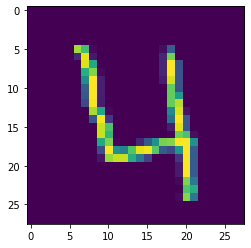

In [7]:
img = X.iloc[3].values.reshape(28,28)
plt.imshow(img)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=18)

In [10]:
X_train.shape

(33600, 784)

In [11]:
X_train = X_train/255
X_val = X_val/255

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

# Model Building

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(X_train,y_train_cat, validation_data=(X_val,y_val_cat), epochs=20, batch_size = 64)

Epoch 1/20
525/525 [==============================] - 2s 2ms/step - loss: 0.6798 - accuracy: 0.8076 - val_loss: 0.3500 - val_accuracy: 0.8983
Epoch 2/20
525/525 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.9086 - val_loss: 0.2767 - val_accuracy: 0.9213
Epoch 3/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.9218 - val_loss: 0.2522 - val_accuracy: 0.9267
Epoch 4/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2422 - accuracy: 0.9303 - val_loss: 0.2268 - val_accuracy: 0.9325
Epoch 5/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2225 - accuracy: 0.9360 - val_loss: 0.2175 - val_accuracy: 0.9326
Epoch 6/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9398 - val_loss: 0.2153 - val_accuracy: 0.9340
Epoch 7/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1950 - accuracy: 0.9432 - val_loss: 0.2178 - val_accuracy: 0.9340
Epoch 

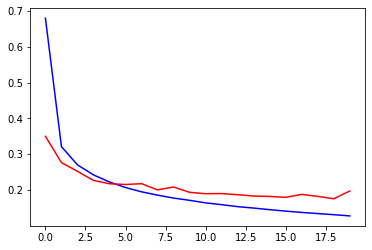

In [18]:
plt.plot(hist.history['loss'], c='blue')
plt.plot(hist.history['val_loss'], c='red')

In [19]:
ip = X_val.iloc[0].values.reshape(1,784)

In [20]:
model.predict_on_batch(ip).argmax()

8

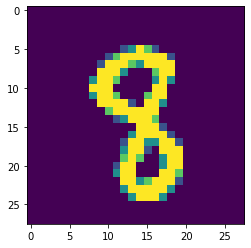

In [21]:
plt.imshow(ip.reshape(28,28))

# Predict on own images

In [22]:
import cv2

In [23]:
img = cv2.imread('myimages/3.jpg',0)

In [24]:
img

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [19, 19, 51, ..., 51, 51, 19]], dtype=uint8)

In [25]:
img = cv2.resize(img,(28,28))

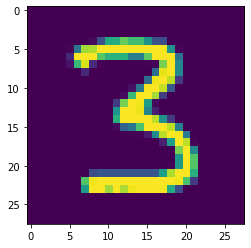

In [26]:
plt.imshow(img)

In [27]:
img = img/255

In [28]:
model.predict_on_batch(img.reshape(1,784)).argmax()

3

In [29]:
def predict_digit(path):
    img = cv2.imread(path,0)
    img = cv2.resize(img,(28,28))
    img = img/255
    return model.predict_on_batch(img.reshape(1,784)).argmax()

In [30]:
predict_digit('myimages/3.jpg')

3

In [31]:
import os

In [33]:
image_names = os.listdir('myimages')

In [34]:
DIR = 'myimages/'
for filename in image_names:
    print(filename, '\t',predict_digit(DIR+filename))

3.jpg 	 3
5.png 	 5
7.jpg 	 7


In [35]:
model.predict_on_batch(ip).sum()

1.0